# Project Business A/B Statistics Testing: 

## Problem Statement and Objectives

The design team of the company has conducted research and created a new landing page with a revamped outline and more relevant content compared to the old page. To evaluate the effectiveness of the new landing page in attracting new subscribers, an experiment was conducted. A total of 140 users were randomly selected and evenly divided into two groups. The first group (control group) was presented with the existing landing page, while the second group (treatment group) was shown the new landing page. Data on user interactions with both versions of the landing page was collected.

The objective of this project is to explore the data and perform a statistical analysis, with a significance level of 5%, in order to determine the effectiveness of the new landing page in acquiring new subscribers for the news portal. The following questions will be addressed:

1.	Do the users spend more time on the new landing page than on the existing landing page?
2.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the 
old page?
3.	Does the converted status depend on the preferred language?
4.	Is the time spent on the new page the same for the different language users?


## Import all the necessary libraries

In [1]:
#Import the data manipulation and stats package for the project
import pandas as pd
import numpy as np
from scipy import stats



In [2]:
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# read the data
df = pd.read_csv('abtest.csv')


Mounted at /content/drive


## Explore the dataset and extract insights using Exploratory Data Analysis

In [4]:
# To find the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546443,treatment,new,8.73,no,English
1,546444,treatment,new,7.46,yes,English
2,546445,treatment,new,7.27,yes,French
3,546446,treatment,new,5.15,no,Spanish
4,546447,treatment,new,3.30,no,French


In [5]:
# To find the last few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
135,546628,treatment,new,4.39,yes,Spanish
136,546629,treatment,new,6.18,yes,English
137,546630,treatment,new,5.65,yes,English
138,546631,treatment,new,7.23,no,English
139,546632,treatment,new,4.75,no,English


In [6]:
# To discover the shape of the dataset
print(f'The Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The Dataset contains 140 rows and 6 columns.


In [7]:
# To check for missing values
print(df.isnull().sum())

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


In [8]:
# use info() to print summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 140 non-null    int64  
 1   group                   140 non-null    object 
 2   landing_page            140 non-null    object 
 3   time_spent_on_the_page  140 non-null    float64
 4   converted               140 non-null    object 
 5   language_preferred      140 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ KB


In [9]:
# To find the statistical summary of the dataset
print(df.describe())

             user_id  time_spent_on_the_page
count     140.000000              140.000000
mean   546544.285714                5.345786
std        62.135763                2.287023
min    546443.000000                0.190000
25%    546477.750000                4.015000
50%    546562.500000                5.380000
75%    546597.250000                7.022500
max    546632.000000               10.710000


In [10]:
print (df.describe(include='object'))

            group landing_page converted language_preferred
count         140          140       140                140
unique          2            2         2                  3
top     treatment          new       yes             French
freq           70           70        82                 51


### Univariate Analysis

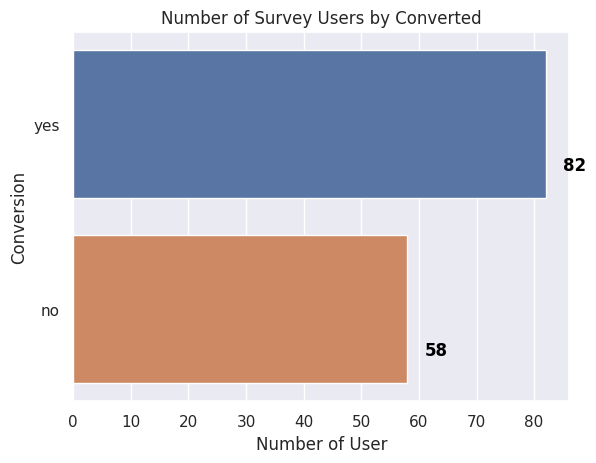

In [11]:
# Create the countplot
sns.set(style="darkgrid")
ax = sns.countplot(data=df, y='converted', order=df.converted.value_counts().index)

# Set the axis labels and title
ax.set(xlabel="Number of User", ylabel="Conversion", title="Number of Survey Users by Converted")

# Add annotations for each bar in the chart
for i, v in enumerate(df.converted.value_counts()):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
# Show the plot
plt.show()

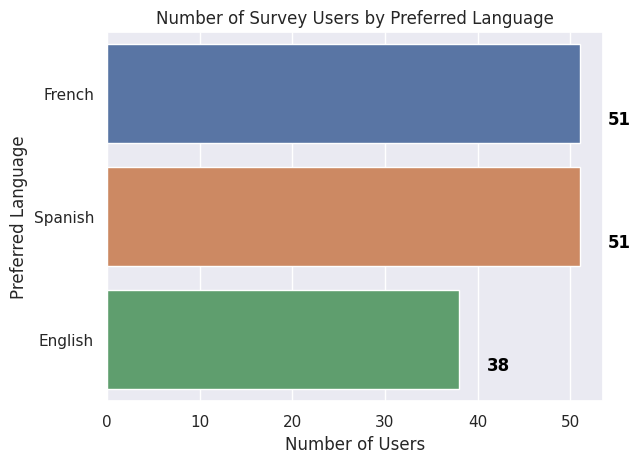

In [12]:
# Create the countplot
sns.set(style="darkgrid")
ax = sns.countplot(data=df, y='language_preferred', order=df['language_preferred'].value_counts().index)

# Set the axis labels and title
ax.set(xlabel="Number of Users", ylabel="Preferred Language", title="Number of Survey Users by Preferred Language")

# Add annotations for each bar in the chart
for i, v in enumerate(df['language_preferred'].value_counts()):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

# Show the plot
plt.show()

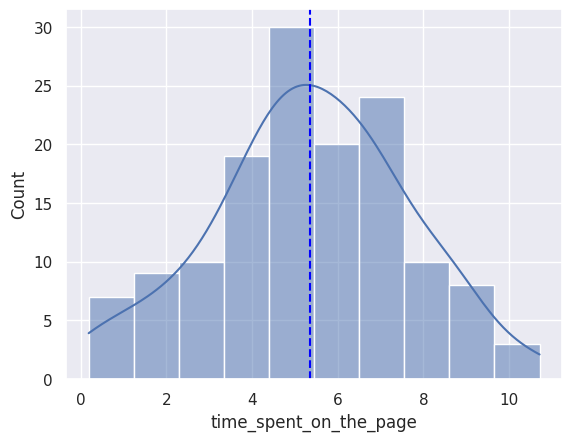

In [13]:
sns.histplot(df['time_spent_on_the_page'], kde = True)
plt.axvline(df['time_spent_on_the_page'].mean(), color='blue', ls = '--',linewidth=1.5)

In [14]:
# Filter converters
converters = df[df['converted'] == 'yes']

# Calculate average time spent on page by converters
average_time = converters['time_spent_on_the_page'].mean()

print("Average time spent on page by converters: {:.2f} minutes".format(average_time))


Average time spent on page by converters: 6.04 minutes


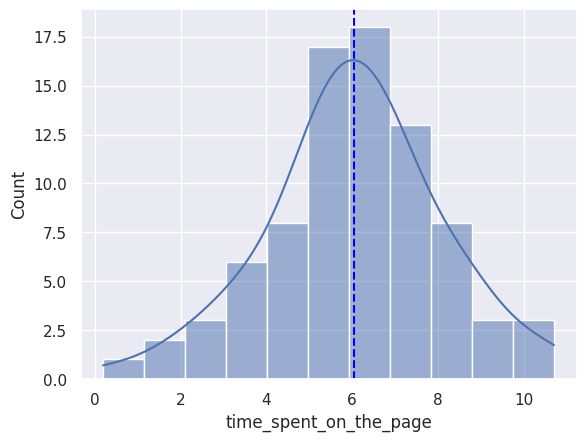

In [15]:
sns.histplot(converters['time_spent_on_the_page'], kde = True)
plt.axvline(converters['time_spent_on_the_page'].mean(), color='blue', ls = '--',linewidth=1.5)

In [16]:
# Filter Non_converters
non_converters = df[df['converted'] == 'no']

# Calculate average time spent on page by converters
average_time = non_converters['time_spent_on_the_page'].mean()

print("Average time spent on page by non_converters: {:.2f} minutes".format(average_time))


Average time spent on page by non_converters: 4.36 minutes


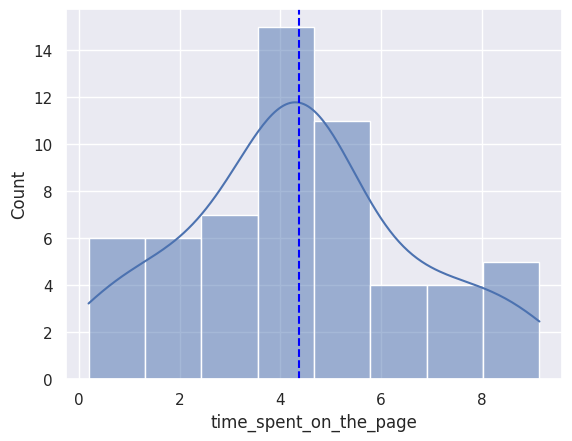

In [17]:
sns.histplot(non_converters['time_spent_on_the_page'], kde = True)
plt.axvline(non_converters['time_spent_on_the_page'].mean(), color='blue', ls = '--',linewidth=1.5)

### Bivariate Analysis

Text(600, 1, 'Highest number of orders in this category')

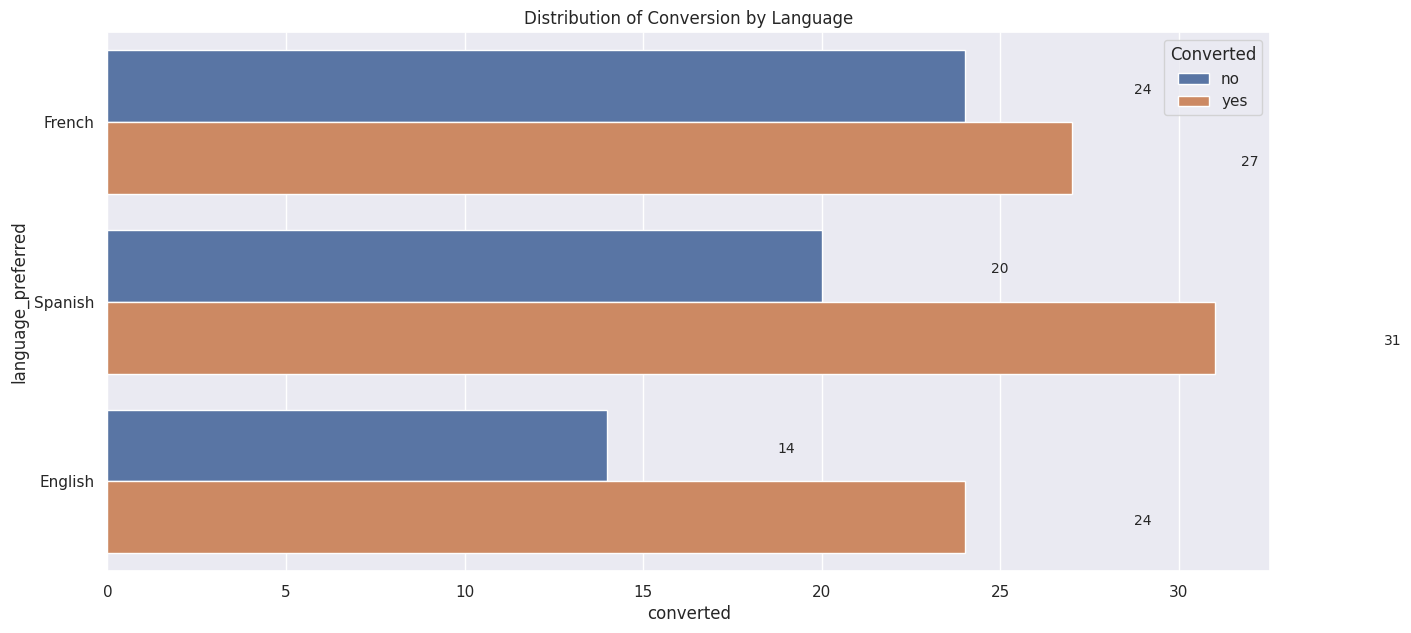

In [18]:
# Countplot showing the distribution of conversion by language
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, y='language_preferred', hue='converted', order=df.language_preferred.value_counts().iloc[:7].index)
plt.xlabel('converted')
plt.ylabel('language_preferred')
plt.title('Distribution of Conversion by Language')
plt.legend(title='Converted', loc='best')
for p in ax.patches:
    width = p.get_width()
    plt.text(5 + width, p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center', fontsize=10)
plt.annotate('Highest number of orders in this category', xy=(300, 0), xytext=(600, 1), arrowprops=dict(facecolor='black', shrink=0.05))

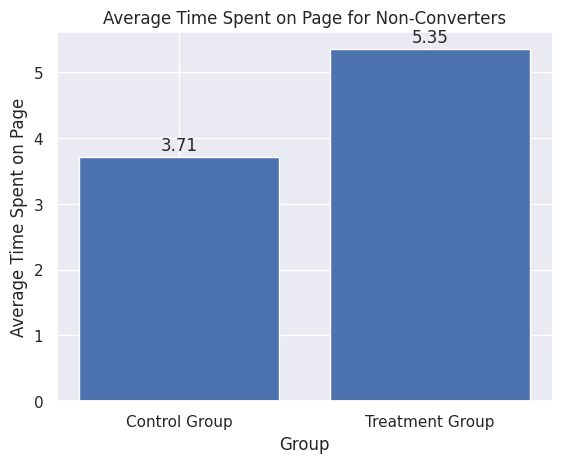

In [19]:

# Filter the data for users who did not convert in the control group
control_nonconvert = df[(df['converted'] == 'no') & (df['group'] == 'control')]
control_nonconvert_avg_time = control_nonconvert['time_spent_on_the_page'].mean()

# Filter the data for users who did not convert in the treatment group
treatment_nonconvert = df[(df['converted'] == 'no') & (df['group'] == 'treatment')]
treatment_nonconvert_avg_time = treatment_nonconvert['time_spent_on_the_page'].mean()

# Create a bar chart
sns.set(style="darkgrid")
plt.bar(['Control Group', 'Treatment Group'], [control_nonconvert_avg_time, treatment_nonconvert_avg_time])
plt.xlabel('Group')
plt.ylabel('Average Time Spent on Page')
plt.title('Average Time Spent on Page for Non-Converters')

# Add annotations for each bar
for i, v in enumerate([control_nonconvert_avg_time, treatment_nonconvert_avg_time]):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center')

plt.show()


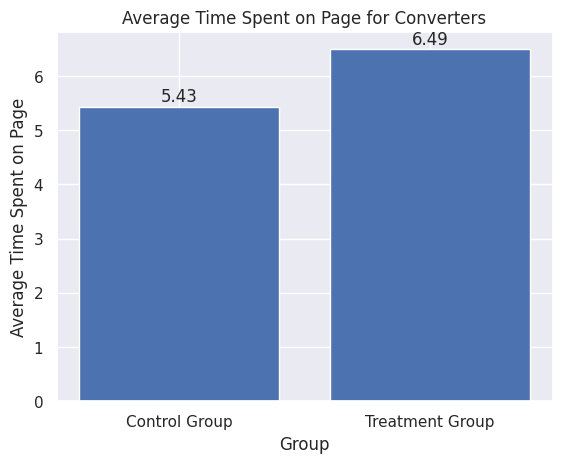

In [20]:
# Filter the data for users who did not convert in the control group
control_convert = df[(df['converted'] == 'yes') & (df['group'] == 'control')]
control_convert_avg_time = control_convert['time_spent_on_the_page'].mean()

# Filter the data for users who did not convert in the treatment group
treatment_convert = df[(df['converted'] == 'yes') & (df['group'] == 'treatment')]
treatment_convert_avg_time = treatment_convert['time_spent_on_the_page'].mean()

# Create a bar chart
sns.set(style="darkgrid")
plt.bar(['Control Group', 'Treatment Group'], [control_convert_avg_time, treatment_convert_avg_time])
plt.xlabel('Group')
plt.ylabel('Average Time Spent on Page')
plt.title('Average Time Spent on Page for Converters')

# Add annotations for each bar
for i, v in enumerate([control_convert_avg_time, treatment_convert_avg_time]):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center')

plt.show()

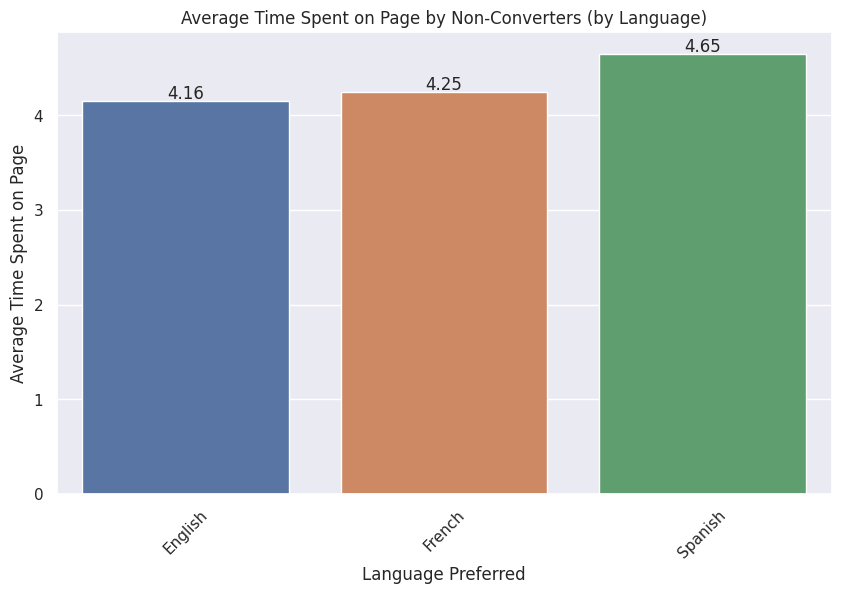

In [21]:
# Filter non-converters
non_converters = df[df['converted'] == 'no']

# Calculate average time spent on page by language
avg_time_by_language = non_converters.groupby('language_preferred')['time_spent_on_the_page'].mean().reset_index()

# Plotting the bar chart
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_time_by_language, x='language_preferred', y='time_spent_on_the_page')

# Set axis labels and title
ax.set(xlabel="Language Preferred", ylabel="Average Time Spent on Page", title="Average Time Spent on Page by Non-Converters (by Language)")

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


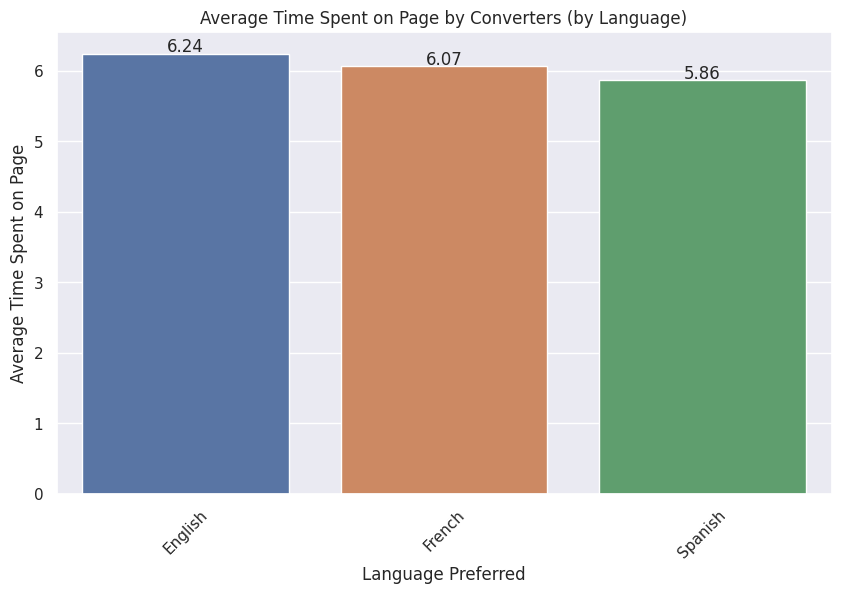

In [22]:
# Filter converters
converters = df[df['converted'] == 'yes']

# Calculate average time spent on page by language
avg_time_by_language = converters.groupby('language_preferred')['time_spent_on_the_page'].mean().reset_index()

# Plotting the bar chart
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_time_by_language, x='language_preferred', y='time_spent_on_the_page')

# Set axis labels and title
ax.set(xlabel="Language Preferred", ylabel="Average Time Spent on Page", title="Average Time Spent on Page by Converters (by Language)")

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

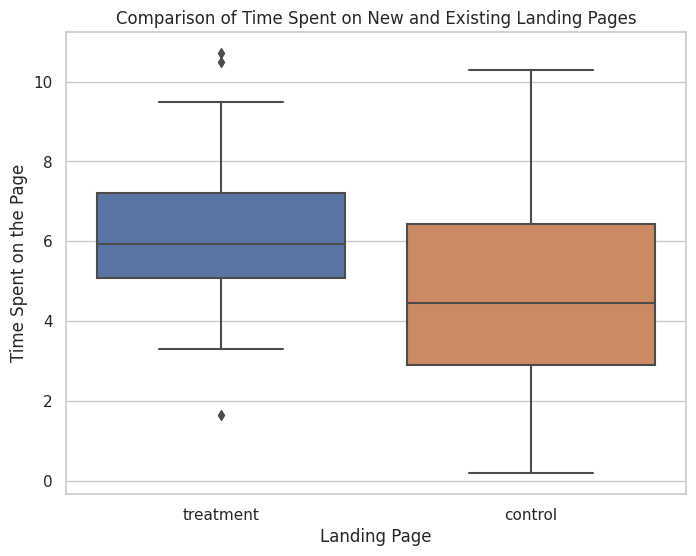

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='group', y='time_spent_on_the_page')

# Set the axis labels and title
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.title('Comparison of Time Spent on New and Existing Landing Pages')

# Show the plot
plt.show()

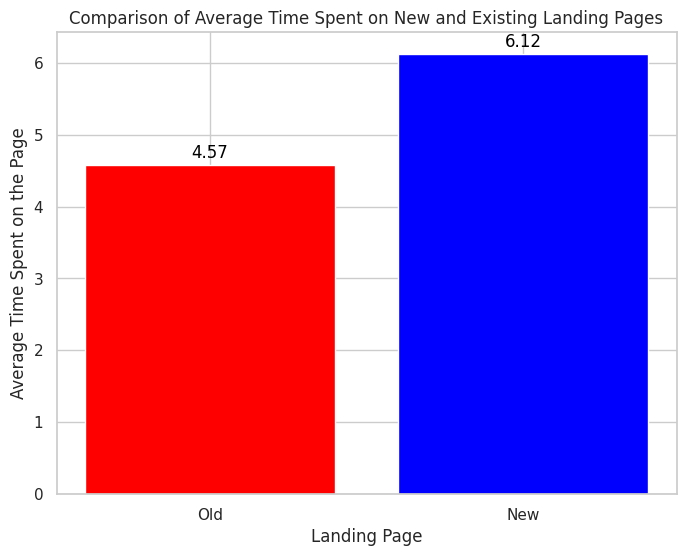

In [24]:
# Calculate average time spent for each group
avg_time_control = df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean()
avg_time_treatment = df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean()

# Create a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.bar(['Old', 'New'], [avg_time_control, avg_time_treatment], color=['red', 'blue'])

# Add annotations for each bar
for i, v in enumerate([avg_time_control, avg_time_treatment]):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', color='black')

# Set the axis labels and title
plt.xlabel('Landing Page')
plt.ylabel('Average Time Spent on the Page')
plt.title('Comparison of Average Time Spent on New and Existing Landing Pages')

# Show the plot
plt.show()


### To perform statistical analysis to test the hypothesis and determine significance

#### Null Hypothesis (H0): The average time spent on the new landing page is equal to the average time spent on the existing landing page.
#### Alternative Hypothesis (H1): The average time spent on the new landing page is significantly different from the average time spent on the existing landing page.

#### We will use the two-sample t-test to compare the means of two independent groups.


Since both test were carried out independent of each other, and the users were seleceted at random, we will use the Two sample t test to whether the differences between two groups are significant or due to random chance.

In [25]:
# Set the significance level of 5%
alpha = 0.05  

In [26]:
# Split the data into the two groups

time_control = df[df['group'] == 'control']['time_spent_on_the_page']
time_treatment = df[df['group'] == 'treatment']['time_spent_on_the_page']

In [27]:
# Calculte the p-value
t_statistic, p_value = stats.ttest_ind(time_treatment, time_control)
print("The p-value is:", p_value)

The p-value is: 4.214950543925052e-05


In [28]:
# Compare the P_value with the Alpha
if p_value < alpha:
    print("The average time spent on the new landing page is significantly different from the existing landing page.")
else:
    print("There is no significant difference in the average time spent between the new and existing landing pages.")

The average time spent on the new landing page is significantly different from the existing landing page.


## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [29]:
# For this we are going to convert the the converted column from str to int using "yes" = 1 and "no" = 0 and store it in t_df
df['converted'] = df['converted'].replace({'no': 0, 'yes': 1})

In [30]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546443,treatment,new,8.73,0,English
1,546444,treatment,new,7.46,1,English
2,546445,treatment,new,7.27,1,French
3,546446,treatment,new,5.15,0,Spanish
4,546447,treatment,new,3.30,0,French


In [31]:

# Null Hypothesis (H0): The conversion rate for the new landing page is equal to the conversion rate for the old landing page.
# Alternative Hypothesis (H1): The conversion rate for the new landing page is greater than the conversion rate for the old landing page.

# Filter the data for control group and treatment group
control_group = df[df['landing_page'] == 'old']
treatment_group = df[df['landing_page'] == 'new']

from statsmodels.stats.proportion import proportions_ztest

# Define the count of conversions and sample sizes for the two groups
control_conversions = control_group['converted'].sum()
control_sample_size = len(control_group)
treatment_conversions = treatment_group['converted'].sum()
treatment_sample_size = len(treatment_group)

# Convert count and sample_sizes to integers
count = np.array([control_conversions, treatment_conversions], dtype=int)
sample_sizes = np.array([control_sample_size, treatment_sample_size], dtype=int)

# Perform the two-sample proportion test
z_stat, p_value = proportions_ztest(count, sample_sizes)

# Compare the p-value with the significance level (alpha)
print("The p-value is:", p_value)
alpha = 0.05
if p_value < alpha:
    print("The conversion rate for the new landing page is significantly different from the old landing page.")
else:
    print("There is no significant difference in the conversion rates.")




The p-value is: 0.039508776322016395
The conversion rate for the new landing page is significantly different from the old landing page.


## 3. Is the conversion and preferred language are independent or related?

In [32]:
# Null Hypothesis (H0): The converted status is independent of the preferred language.
# Alternative Hypothesis (H1): The converted status is dependent on the preferred language.

# I used the chi-square test of independence to determine if the converted status depends on the preferred language.

alpha = 0.05  # Significance level of 5%


# Create a contingency table of converted status and preferred language
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("The p-value is:", p_value)
# Step 6: Compare the p-value with alpha
if p_value < alpha:
    print("The converted status depends on the preferred language.")
else:
    print("The converted status is independent of the preferred language.")


The p-value is: 0.5773543434546795
The converted status is independent of the preferred language.


## 4. Is the time spent on the new page same for the different language users?

In [33]:
from scipy.stats import f_oneway

# Separate the time spent on the new page by language
language_groups = []
for language in df['language_preferred'].unique():
    language_groups.append(df.loc[df['language_preferred'] == language]['time_spent_on_the_page'])

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*language_groups)

# Compare the p-value with the significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("The time spent on the new page is different for different language users.")
else:
    print("The time spent on the new page is the same for different language users.")


The time spent on the new page is the same for different language users.


## Conclusion

In the conducted analysis, several statistical tests were used to examine different aspects of the data. Let's further discuss the merits of these methods and elaborate on the obtained results.

1) Two-Sample t-test for Average Time Spent:
The two-sample t-test is a suitable method for comparing the means of two independent samples. In this case, it was used to compare the average time spent on the new landing page versus the existing landing page. The obtained p-value of 4.214950543925052e-05 suggests strong evidence that the average time spent on the two landing pages is significantly different. This result implies that the new landing page may have a different user experience or content that attracts users for a longer duration compared to the existing landing page. It indicates a potential positive impact of the new landing page on user engagement.

2) Two-Proportion t-test for Conversion Rate:
The two-proportion t-test is used to compare the proportions of two independent groups. In this case, it was employed to examine if the conversion rate for the new landing page is greater than the conversion rate for the old landing page. The obtained p-value of 0.039508776322016395 suggests a significant difference in conversion rates between the two landing pages. This finding implies that the new landing page is more effective in converting users compared to the old landing page. It indicates that the changes made in the new landing page design or content may have positively influenced user conversions.

3) Chi-Square Test of Independence for Conversion and Preferred Language:
The chi-square test of independence is a suitable method to determine if there is an association between two categorical variables. In this case, it was used to explore the relationship between the conversion status and the preferred language. The obtained p-value of 0.5773543434546795 indicates that there is no significant association between the converted status and the preferred language. This implies that the preferred language chosen by the users does not have a notable influence on their likelihood of conversion. It suggests that the language preference is independent of the conversion outcome.

4) One-Way ANOVA for Time Spent on New Page and Preferred Language:
The one-way ANOVA is employed to compare means across multiple groups. In this case, it was used to investigate if the time spent on the new landing page varies among users with different preferred languages. The obtained result suggests that there is no significant difference in the time spent on the new page for users with different language preferences. This finding implies that the preferred language does not play a significant role in determining the time spent on the page. Other factors such as page content or user behavior may have a more substantial influence on the time spent.

Overall, the applied statistical methods provide valuable insights into different aspects of the data. The results indicate that the new landing page has a different average time spent and a higher conversion rate compared to the old landing page. However, language preference does not seem to affect the conversion outcome or the time spent on the page. These findings can guide decision-making and optimization strategies for improving user engagement and conversion rates on the landing page. It is important to consider these results in conjunction with other relevant factors and conduct further analysis or experiments to gain a comprehensive understanding of user behavior and maximize conversion opportunities.

In [ ]:
/content/Comparing-the-Impact-of-a-Redesigned-Landing-Page-on-Subscriber-Acquisition-A-Statistical-Analysis